# Travaux pratiques : Séance 3
## Quatrième partie: appliquons la procédure complete sur toutes les features

Importation des librairies et des modules nécessaires

In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np

Importation du dataset et sauvegarde de la partie data/target

In [2]:
iris = datasets.load_iris()

# nous prenons toutes les fonctionnalités, pas seulement les deux premières ou les deux dernières
X = iris.data
y = iris.target

In [3]:
def notre_cross_validation (clf, X, y, num_folds):
    list_accuracy_train = []
    list_accuracy_val = []

    # mélangeons d’abord l’ensemble de données
    y = y.reshape(-1, 1)
    Xy = np.hstack((X, y))
    np.random.shuffle(Xy)
    X_trainvalidate = Xy[:,:-1]
    y_trainvalidate = Xy[:,-1].flatten()
    
    # la taille d'une portion
    a = int(len(X_trainvalidate)/5)
    
    for i in range (num_folds):

        # ---> la partie destinée à la validation
        X_val = X_trainvalidate[a*i:a*(i+1)]
        y_val = y_trainvalidate[a*i:a*(i+1)]

        # ---> la partie destinée à la validation
        # puisque nous sélectionnons des lignes de l'ensemble de données pour la validation, 
        # nous devons prendre tout ce qui reste pour la formation, c'est-à-dire toutes les lignes 
        # qui précèdent et celles qui suivent et les rassembler dans un tableau
        X_train_ante_validation = X_trainvalidate[:a*i]
        X_train_post_validation = X_trainvalidate[a*(i+1):]
        X_train = np.concatenate([X_train_ante_validation, X_train_post_validation])

        # après avoir fait l'opération pour les features, on le fait aussi sur la target
        y_train_ante_validation = y_trainvalidate[:a*i]
        y_train_post_validation = y_trainvalidate[a*(i+1):]
        y_train = np.concatenate([y_train_ante_validation, y_train_post_validation])

        # maintenant nous sommes prêts à faire la training
        clf.fit(X_train, y_train)

        # puisque nous créons la fonction, nous pouvons faire mieux que cross_val_score 
        # et également renvoyer l'accuracy sur les données d'entraînement

        # calculons la accuracy sur les données de validation
        y_pred_test = clf.predict(X_val)
        accuracy_val = accuracy_score(y_pred_test, y_val)
        list_accuracy_val.append(accuracy_val)

        # calculons la accuracy sur les données d'entraînement
        y_pred_train = clf.predict(X_train)
        accuracy_train = accuracy_score(y_pred_train, y_train)
        list_accuracy_train.append(accuracy_train)

    return list_accuracy_val, list_accuracy_train
    

In [4]:
# divisons l'ensemble de données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
max_k = 80

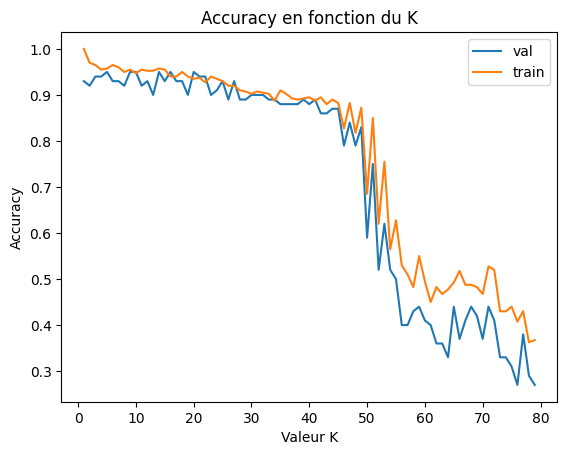

Max de l'ensemble de validation :  0.95
Valeur K correspondante :  4


In [6]:
list_accuracy_val = []
list_accuracy_train = []

for i in range (1, max_k):
    clf = KNeighborsClassifier(n_neighbors=i)
    accuracy_scores_val, accuracy_scores_train = notre_cross_validation(clf, X_train, y_train, 5) # C'est 5-fold cross-validation
    list_accuracy_val.append(mean(accuracy_scores_val))
    list_accuracy_train.append(mean(accuracy_scores_train))

plt.plot(range (1, max_k),list_accuracy_val, label = 'val')
plt.plot(range (1, max_k),list_accuracy_train, label = 'train')

plt.xlabel("Valeur K")
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction du K")
plt.legend()
plt.show()


print("Max de l'ensemble de validation : ", max(list_accuracy_val)) 
best_K = list_accuracy_val.index(max(list_accuracy_val))
print("Valeur K correspondante : ", best_K)




<b> Maintenant, entrainons à nouveau le modèle sur l'ensemble d'entrainement avec le meilleur K e vérifions l'accuracy sur l'ensemble de test

In [7]:
clf = KNeighborsClassifier(n_neighbors=best_K)
clf.fit(X_train,y_train)

y_pred_test = clf.predict(X_test)
accuracy_test = accuracy_score(y_pred_test, y_test)
print("Accuracy finale de l'ensemble de test : ", accuracy_test)

y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_pred_train, y_train)
print("Accuracy finale de l'ensemble d'entrainement : ", accuracy_train)


Accuracy finale de l'ensemble de test :  0.98
Accuracy finale de l'ensemble d'entrainement :  0.95
